### Learn the basics of rdkit and the Frag-20_prepare package

#### This tutorial was adapted from the following sources:

* https://github.com/rdkit/rdkit-tutorials/tree/master/notebooks

* https://github.com/chembl/mychembl/blob/master/ipython_notebooks/02_myChEMBL_RDKit_tutorial.ipynb

* https://github.com/jenniening/Frag20_prepare/blob/master/tutorials/Data_preparation_tutorial.ipynb


It runs in **Python 3.9.13** with **RDKit version 2022.03.5**. To install RDKit in a Conda environment use `conda install -c conda-forge rdkit`. 

Other packages:
* numpy version 1.23.1
* pandas version 1.4.2

In [1]:
#import necessary modules 

import rdkit

from rdkit import Chem #for basic functionality
from rdkit.Chem import AllChem #for more advanced features

from rdkit import rdBase
from rdkit import RDConfig
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors

from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
from rdkit.Chem.Draw import SimilarityMaps

import numpy as np
import pandas as pd
from rdkit.Chem import PandasTools

from itertools import chain

## Reading, displaying, and obtaining info about molecules

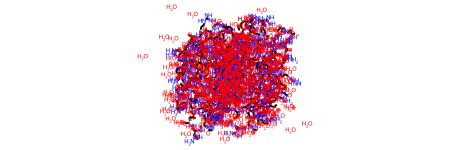

In [2]:
#load protein from pdb file

lys = Chem.MolFromPDBFile('lysozyme_1LYS.pdb')

lys

In [3]:
#get number of atoms

lys.GetNumAtoms()

2217

In [4]:
# get info for first 20 atoms

residues = [atom.GetPDBResidueInfo() for atom in lys.GetAtoms()]

resinf = [(res.GetResidueNumber(),res.GetResidueName()) for res in residues]

resinf[0:20]

[(1, 'LYS'),
 (1, 'LYS'),
 (1, 'LYS'),
 (1, 'LYS'),
 (1, 'LYS'),
 (1, 'LYS'),
 (1, 'LYS'),
 (1, 'LYS'),
 (1, 'LYS'),
 (2, 'VAL'),
 (2, 'VAL'),
 (2, 'VAL'),
 (2, 'VAL'),
 (2, 'VAL'),
 (2, 'VAL'),
 (2, 'VAL'),
 (3, 'PHE'),
 (3, 'PHE'),
 (3, 'PHE'),
 (3, 'PHE')]

In [5]:
#get number of amino acids (as unique set elements)

len(sorted(set(resinf)))

246

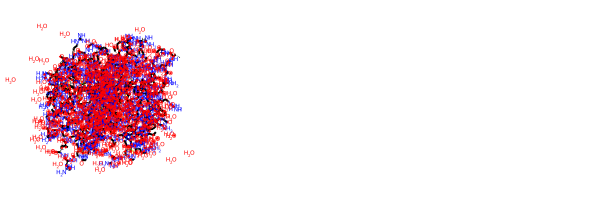

In [6]:
#display molecule

Draw.MolsToGridImage([lys])

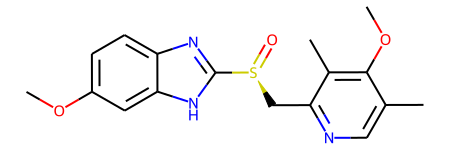

In [7]:
#read in Smiles string

m = Chem.MolFromSmiles('COc1ccc2c(c1)[nH]c(n2)[S@@](=O)Cc1ncc(c(c1C)OC)C')

m

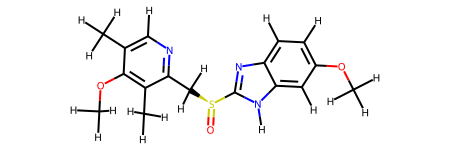

In [8]:
# add H's

m2 = Chem.AddHs(m)

m2

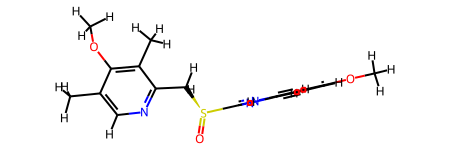

In [9]:
#good idea to optimize conformation using a force field

AllChem.EmbedMolecule(m2)
AllChem.UFFOptimizeMolecule(m2)

m2

In [22]:
# get info about atom with index 5

print(m.GetAtomWithIdx(5).GetSymbol())
print(m.GetAtomWithIdx(5).GetExplicitValence())
print(m.GetBonds()[5].GetBondType())
print(m.GetBondBetweenAtoms(5,6).GetBondType())

C
4
AROMATIC
SINGLE


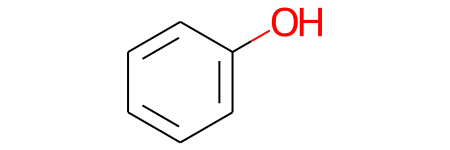

In [18]:
#read in molecule from mol block

molblock = """phenol
  Mrv1682210081607082D          

  7  7  0  0  0  0            999 V2000
   -0.6473    1.0929    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3618    0.6804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3618   -0.1447    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6473   -0.5572    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0671   -0.1447    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0671    0.6804    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7816    1.0929    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  2  3  2  0  0  0  0
  3  4  1  0  0  0  0
  4  5  2  0  0  0  0
  5  6  1  0  0  0  0
  1  6  2  0  0  0  0
  6  7  1  0  0  0  0
M  END
"""
phenol = Chem.MolFromMolBlock(molblock)

phenol

In [11]:
phenol.GetNumConformers()

1

In [12]:
phenol.GetConformer().Is2D()

AttributeError: 'Conformer' object has no attribute 'Is2D'

In [13]:
#can't directly determine if a conformer is 2D- use "Is3D" query and see if false

phenol.GetConformer().Is3D()

False

In [2]:
# load molecule from an sdf file - this would also work for groups of molecules

suppl = Chem.SDMolSupplier('cholesterol-3D-structure-CT1001897301.sdf')
for mol in suppl:
    print(mol.GetNumAtoms())

28


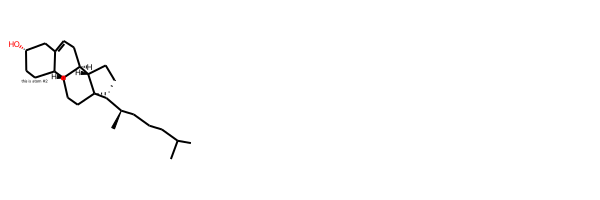

In [12]:
cholesterol = suppl[0]
cholesterol.GetAtomWithIdx(2).SetProp('atomNote', 'this is atom #2') # annotate an atom

Draw.MolsToGridImage([cholesterol])

In [13]:
cholesterol.SetProp("_Name","cholesterol") #set name property
#first argument of SetProp() is property name and second is property value

print(Chem.MolToMolBlock(cholesterol))

cholesterol
     RDKit          3D

 28 31  0  0  0  0  0  0  0  0999 V2000
   -0.0187    1.5254    0.0104 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.0021   -0.0041    0.0020 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6585   -0.5178    1.2851 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.4183    2.0552   -0.0004 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.1641    1.4423    1.1730 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8094    2.2372    1.9753 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.5750    1.7482    3.1700 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0229    0.3029    2.9254 C   0  0  1  0  0  0  0  0  0  0  0  0
    4.6452   -0.2562    4.1923 C   0  0  2  0  0  0  0  0  0  0  0  0
    5.9567    0.4007    4.6368 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.6114   -0.6949    5.5217 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0120   -2.0462    5.0588 C   0  0  2  0  0  0  0  0  0  0  0  0
    7.1264   -2.9964    4.6157 C   0  0  1  0  0  0  0  0  0  0  0  0
    8.0581   -

## SMARTS queries and substructure matching

See https://www.daylight.com/dayhtml/doc/theory/theory.smarts.html for SMARTS queries

In [14]:
##is any atom in the molecule m in a ring? (returns True if yes, false if No)

query = Chem.MolFromSmarts('[R]') 

phenol.HasSubstructMatch(query)

True

In [15]:
##is any atom in the molecule aromatic?

query2 = Chem.MolFromSmarts('[*c]')

phenol.HasSubstructMatch(query2)

True

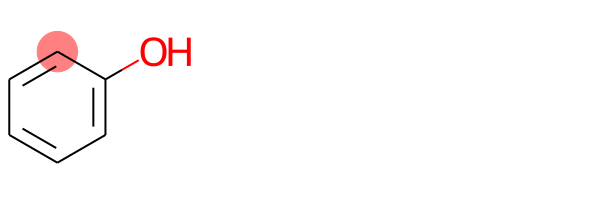

In [17]:
#display query results

highlight = phenol.GetSubstructMatch(query2)

Draw.MolsToGridImage([phenol], 
                     highlightAtomLists = [highlight],
                     useSVG=False
                    )

In [14]:
patt = Chem.MolFromSmarts('c[NH1]')

cholesterol.HasSubstructMatch(patt)

False

In [16]:
patt2 = Chem.MolFromSmarts('CO')

cholesterol.HasSubstructMatch(patt2)

True

## Fingerprints and similarity matching

"Similarity" is a value between 0 and 1 indicating the extent to which molecules are similar in their topology. The default metric for similarity is Tanimoto, which is mathematically defined as intersection over union; others (Dice, Cosine, Sokal, Russel, Kulczynski, McConnaughey, Tversky) can be specified to overwrite the default.

Similarity is very important in cheminformatics, specifically for drug design. According to the similar property principle of Johnson and Maggiora: "similar compounds have similar properties." Thus, being able to classify the extent to which different compounds are similar to a target allows for more a more streamlined approach to find compounds with desired properties. (Wikipedia, https://en.wikipedia.org/wiki/Chemical_similarity)

In [20]:
molecules = [cholesterol, phenol]
fps = [FingerprintMols.FingerprintMol(x) for x in molecules]

#comparing cholesterol with itself
DataStructs.FingerprintSimilarity(fps[0],fps[0])

1.0


In [21]:
#comparing cholesterol with phenol
DataStructs.FingerprintSimilarity(fps[0],fps[1])

0.5


In [41]:
#change metric to Dice similarity
DataStructs.FingerprintSimilarity(fps[0],fps[1], metric=DataStructs.DiceSimilarity)

0.6666666666666666

A common task in cheminformatics is creating sets of diverse molecules, e.g. for the sake of machine learning model training... this can be done using Morgan fingerprinting and rdkit.SimDivFilters module

[1, 5, 10]


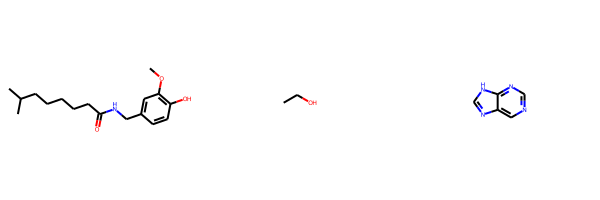

In [57]:
#list of some molecules
mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mol3 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1")
mol4 = Chem.MolFromSmiles('c1c(CCO)ncnc1C(=O)O')
mol5 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
mol6 = Chem.MolFromSmiles('CCO')
mol7 = Chem.MolFromSmiles('CC(C)O')
mol8 = Chem.MolFromSmiles('c1cccc(O)c1')
mol9 = Chem.MolFromSmiles('C(C)(C)(C)O')
mol10 = Chem.MolFromSmiles('OCC(O)CO')
mol11 = Chem.MolFromSmiles('[nH]1cnc2cncnc21')

#get morgan fingerprints
ms = [mol1, mol2, mol3, mol4, mol5, mol6, mol7, mol8, mol9, mol10, mol11]
fps = [GetMorganFingerprint(x,3) for x in ms]
nfps = len(fps)

#dissimilarity algorithm
def distij(i,j,fps=fps):
    return 1-DataStructs.DiceSimilarity(fps[i],fps[j])

#use picker to pick 3 random unlike molecules from the list
picker = MaxMinPicker()
pickIndices = picker.LazyPick(distij,nfps,3,seed=12)
print(list(pickIndices))

picks = [ms[x] for x in pickIndices]

Draw.MolsToGridImage(picks, useSVG=False)

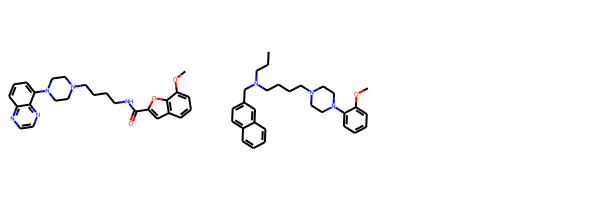

In [46]:
# similarity maps

mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')
Draw.MolsToGridImage([mol,refmol], useSVG=False)

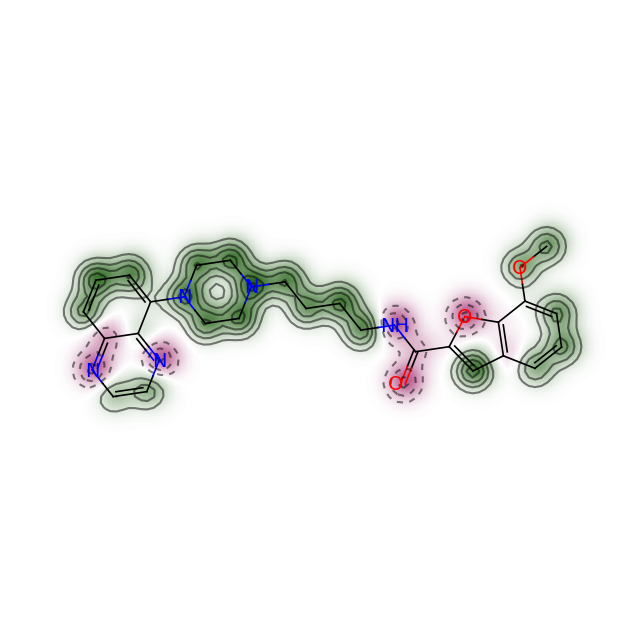

In [52]:
fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetAPFingerprint)

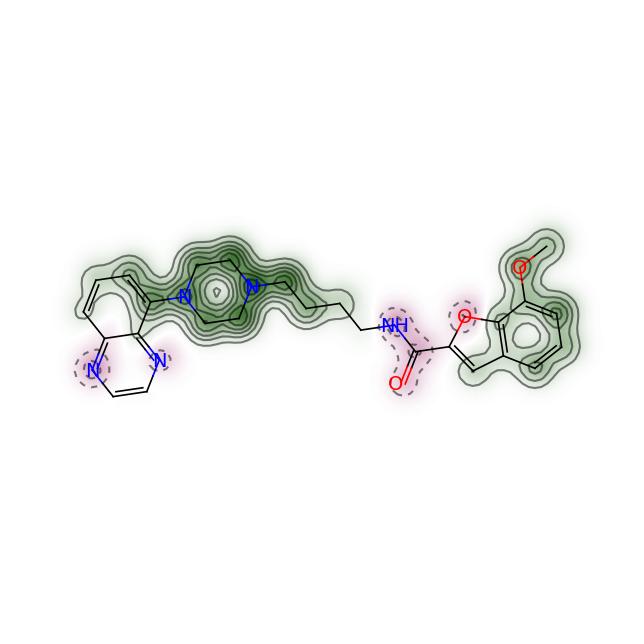

In [54]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

https://jcheminf.biomedcentral.com/articles/10.1186/1758-2946-5-43

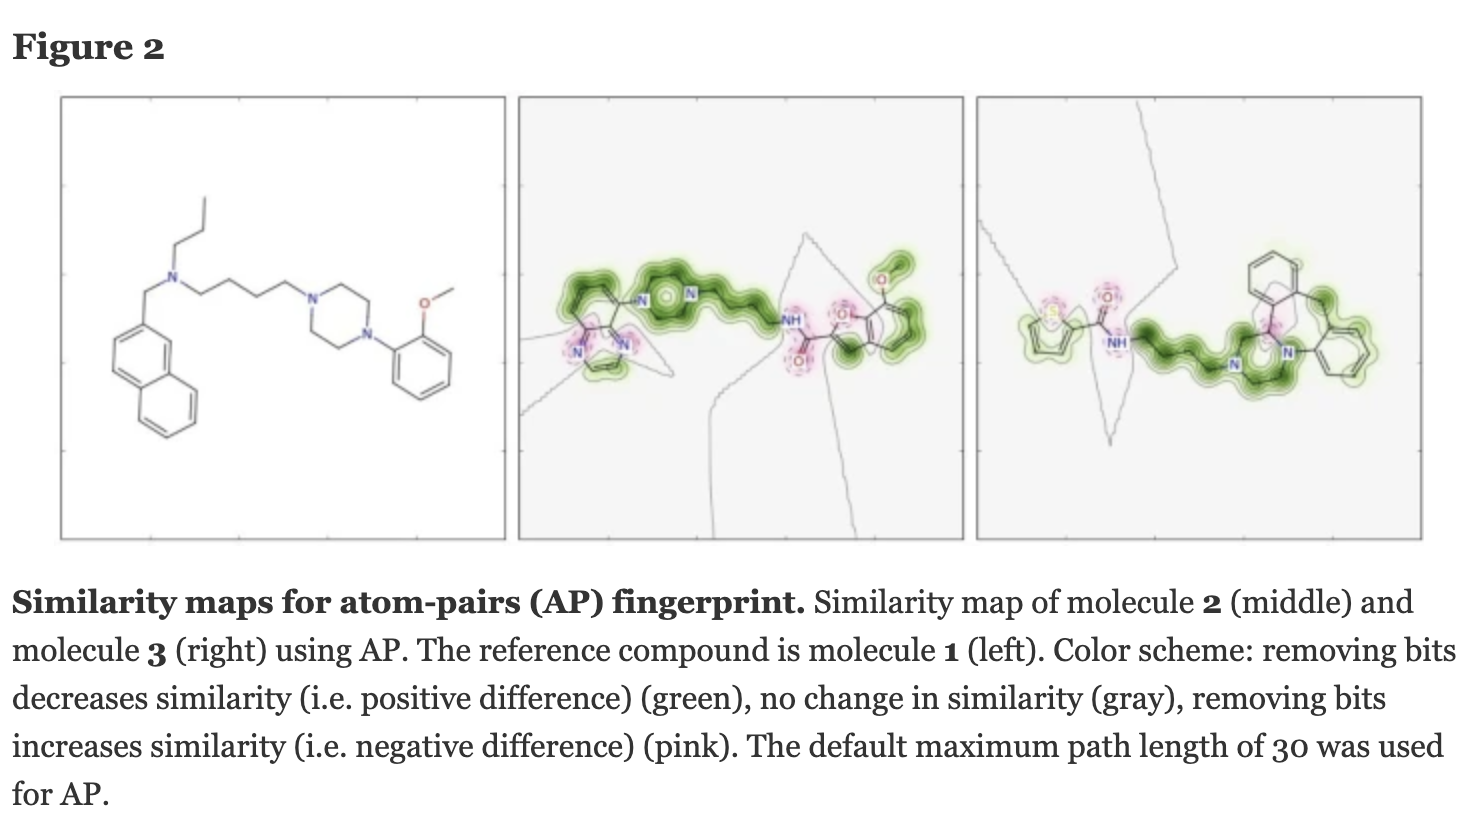

To make a similarity map:
for each atom... the atom is removed (as a fingerprint bit) and then the similarity score to the reference/comparison compound is recalculated. If similarity improves with the removal of this fingerprint bit, the region is colored red. In a qualitative sense this means that the atom doesn't contribute to similarity. If similarity decreases with removal of bit, it means that atom is similar to the reference. It will be colored green

## Descriptors

In [39]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')

print('molecular weight:', f'{Descriptors.MolWt(m):.4f}')

print('number of valence electrons:', Descriptors.NumValenceElectrons(m))

molecular weight: 122.1230
number of valence electrons: 46


See https://github.com/chembl/mychembl/blob/master/ipython_notebooks/02_myChEMBL_RDKit_tutorial.ipynb for a list of available descriptors (scroll to the bottom)

## Chemical Reactions with SMARTS

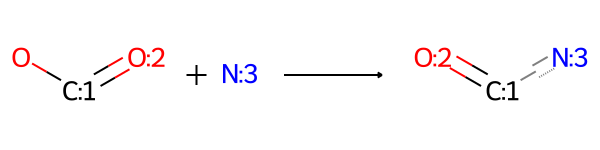

In [26]:
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N:3]>>[C:1](=[O:2])[N:3]')

rxn

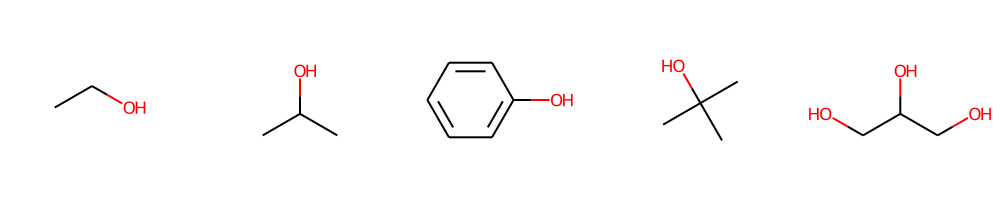

In [22]:
ethanol = Chem.MolFromSmiles('CCO')
isopropanol = Chem.MolFromSmiles('CC(C)O')
phenol = Chem.MolFromSmiles('c1cccc(O)c1')
t_butanol = Chem.MolFromSmiles('C(C)(C)(C)O')
glycerol = Chem.MolFromSmiles('OCC(O)CO')

alcohols = [ethanol, isopropanol, phenol, t_butanol, glycerol]

Draw.MolsToGridImage(alcohols, molsPerRow=5)

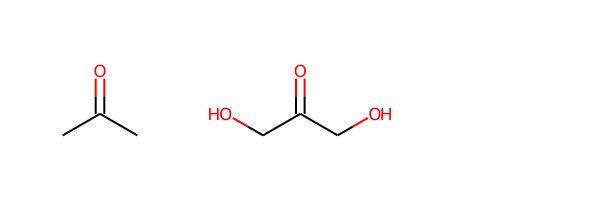

In [24]:
# oxidize the aliphatic carbons
rxn = AllChem.ReactionFromSmarts('[CH:1][O:2]>>[C:1]=[O:2]')

all_products_tuples = tuple(rxn.RunReactants((mol, )) for mol in alcohols)
all_products = list(chain.from_iterable(chain.from_iterable(all_products_tuples)))

all_products_smiles = set()
all_products_unique = []
for mol in all_products:
    smi = Chem.MolToSmiles(mol)
    if smi not in all_products_smiles:
        all_products_smiles.add(smi)
        all_products_unique.append(mol)
len(all_products_unique)

Draw.MolsToGridImage(all_products_unique)

## rdkit with Pandas dataframes

In [58]:
df = pd.read_csv('DOWNLOAD-fG34CQxrYthgp_shX1q_Gq9ry_SjFkT0IVlRGqDVxVA=.csv', sep=';')

[str(x) for x in df.columns]

/var/folders/0m/ksgwf4r97nq_bv4d377k90nc0000gn/T/ipykernel_3083/1925182293.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DOWNLOAD-fG34CQxrYthgp_shX1q_Gq9ry_SjFkT0IVlRGqDVxVA=.csv', sep=';')


['ChEMBL ID',
 'Name',
 'Synonyms',
 'Type',
 'Max Phase',
 'Molecular Weight',
 'Targets',
 'Bioactivities',
 'AlogP',
 'Polar Surface Area',
 'HBA',
 'HBD',
 '#RO5 Violations',
 '#Rotatable Bonds',
 'Passes Ro3',
 'QED Weighted',
 'CX Acidic pKa',
 'CX Basic pKa',
 'CX LogP',
 'CX LogD',
 'Aromatic Rings',
 'Structure Type',
 'Inorganic Flag',
 'Heavy Atoms',
 'HBA (Lipinski)',
 'HBD (Lipinski)',
 '#RO5 Violations (Lipinski)',
 'Molecular Weight (Monoisotopic)',
 'Molecular Species',
 'Molecular Formula',
 'Smiles',
 'Inchi Key']

In [59]:
len(df)

2331700

In [60]:
#keep only targets that have smiles

df = df[df['Targets'].notnull() & # Keep cpds with SMILES
        (df['Smiles'].notnull())]  # that respect Ro5

len(df)

2213279

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,Heavy Atoms,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key,ROMol
1,CHEMBL539070,NaN,NaN,Small molecule,0,286.79,1.0,1.0,2.28,73.06,...,17,5,3,0,250.0888,NEUTRAL,C11H15ClN4OS,CCCOc1ccccc1-c1nnc(NN)s1.Cl,WPEWNRKLKLNLSO-UHFFFAOYSA-N,
2,CHEMBL3335528,NaN,NaN,Small molecule,0,842.80,2.0,6.0,0.18,269.57,...,60,19,5,2,842.2633,ACID,C41H46O19,COC(=O)[C@H](O[C@@H]1O[C@@H](C)[C@@H](O)[C@@H]...,KGUJQZWYZPYYRZ-LWEWUKDVSA-N,
3,CHEMBL2419030,NaN,NaN,Small molecule,0,359.33,4.0,4.0,3.94,85.13,...,24,6,1,0,359.0551,NEUTRAL,C14H12F3N3O3S,O=c1nc(NC2CCCC2)sc2c([N+](=O)[O-])cc(C(F)(F)F)...,QGDMYSDFCXOKML-UHFFFAOYSA-N,
5,CHEMBL3827271,NaN,NaN,Small molecule,0,712.85,1.0,1.0,-2.84,319.06,...,50,19,14,3,712.4232,ZWITTERION,C31H56N10O9,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(N)=O)NC(=O)[C@H...,QJQNNLICZLLPMB-VUBDRERZSA-N,
7,CHEMBL3465961,NaN,NaN,Small molecule,0,319.42,16.0,22.0,2.22,50.50,...,23,4,1,0,319.206,BASE,C18H26FN3O,CC(O)CN1CCC(CN(C)Cc2cc(C#N)ccc2F)CC1,FZEVYCHTADTXPM-UHFFFAOYSA-N,
9,CHEMBL3824158,NaN,NaN,Small molecule,0,422.48,2.0,4.0,5.09,109.54,...,31,7,2,1,422.1842,ACID,C24H26N2O5,CCCCCCCNC(C1=C(O)C(=O)c2ccccc2C1=O)c1ccc([N+](...,AXOVDUYYBUYLPC-UHFFFAOYSA-N,
10,CHEMBL194112,NaN,NaN,Small molecule,0,366.38,2.0,3.0,4.80,57.53,...,26,3,2,0,366.1443,NEUTRAL,C20H21F3O3,C[C@]12CCC3c4ccc(O)cc4CCC3C1CC(C(=O)C(F)(F)F)=C2O,FIBOSLUEJGPVMK-RYCRIANLSA-N,
11,CHEMBL2047226,NaN,NaN,Small molecule,0,452.40,4.0,8.0,4.93,53.08,...,29,5,2,0,451.1372,NEUTRAL,C23H26BrN5,Brc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1,WOAVNWHCIXCOIZ-UHFFFAOYSA-N,
13,CHEMBL1991010,NaN,NaN,Small molecule,0,454.05,60.0,60.0,5.18,40.54,...,31,3,1,1,417.2668,NEUTRAL,C28H36ClNO2,CCc1ccc(/C=C/C(=O)C2CN(CC)CCC2(O)/C=C/c2ccc(CC...,XJDPAUYFONOZBC-DCPGAFKKSA-N,
14,CHEMBL195644,NaN,NaN,Small molecule,0,375.47,2.0,3.0,4.95,70.42,...,28,4,2,0,375.1834,NEUTRAL,C24H25NO3,C[C@]12CCC3c4ccc(O)cc4CCC3C1CC(C(=O)c1cccnc1)=C2O,MOBPUUUBXAHZBM-KSAYNYSMSA-N,

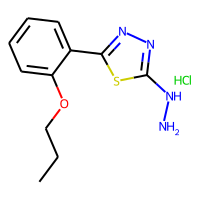
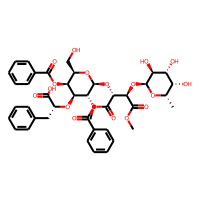
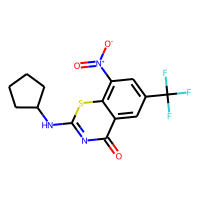
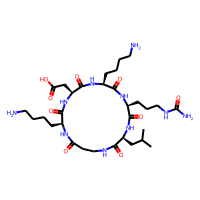
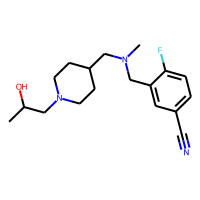
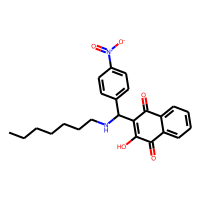
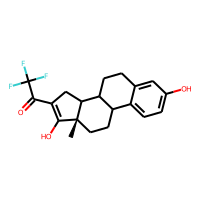
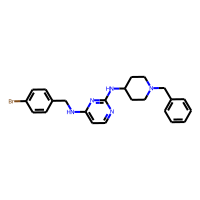
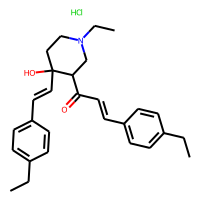
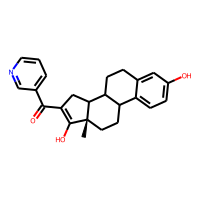

In [66]:
# convert smiles to rdkit molecule representations (do for first 10 molecules for speed of computation)

df = df[0:10]

PandasTools.AddMoleculeColumnToFrame(df, smilesCol='Smiles')

df

In [71]:
#helper functions

class FP:
    """
    Molecular fingerprint class, useful to pack features in pandas df
    
    Parameters  
    ---------- 
    fp : np.array
        Features stored in numpy array
    names : list, np.array
        Names of the features
    """
    def __init__(self, fp, names):
        self.fp = fp
        self.names = names
    def __str__(self):
        return "%d bit FP" % len(self.fp)
    def __len__(self):
        return len(self.fp)
    
def get_cfps(mol, radius=2, nBits=1024, useFeatures=False, counts=False, dtype=np.float32):
    """Calculates circular (Morgan) fingerprint.  
    http://rdkit.org/docs/GettingStartedInPython.html#morgan-fingerprints-circular-fingerprints  
    
    Parameters
    ----------
    mol : rdkit.Chem.rdchem.Mol
    radius : float 
        Fingerprint radius, default 2
    nBits : int 
        Length of hashed fingerprint (without descriptors), default 1024
    useFeatures : bool  
        To get feature fingerprints (FCFP) instead of normal ones (ECFP), defaults to False
    counts : bool
        If set to true it returns for each bit number of appearances of each substructure (counts). Defaults to false (fingerprint is binary)
    dtype : np.dtype
        Numpy data type for the array. Defaults to np.float32 because it is the default dtype for scikit-learn
    
    Returns
    -------
    ML.FP
        Fingerprint (feature) object
    """
    arr = np.zeros((1,), dtype)
    
    if counts is True:
        info = {}
        fp = AllChem.GetHashedMorganFingerprint(mol, radius, nBits, useFeatures=useFeatures)
        DataStructs.ConvertToNumpyArray(fp, arr)
    else:
        DataStructs.ConvertToNumpyArray(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nBits, useFeatures=useFeatures), arr)
    return FP(arr, range(nBits))

,ChEMBL ID,Name,Synonyms,Type,Max Phase,Molecular Weight,Targets,Bioactivities,AlogP,Polar Surface Area,...,HBA (Lipinski),HBD (Lipinski),#RO5 Violations (Lipinski),Molecular Weight (Monoisotopic),Molecular Species,Molecular Formula,Smiles,Inchi Key,ROMol,FP
1,CHEMBL539070,NaN,NaN,Small molecule,0,286.79,1.0,1.0,2.28,73.06,...,5,3,0,250.0888,NEUTRAL,C11H15ClN4OS,CCCOc1ccccc1-c1nnc(NN)s1.Cl,WPEWNRKLKLNLSO-UHFFFAOYSA-N,,1024 bit FP
2,CHEMBL3335528,NaN,NaN,Small molecule,0,842.80,2.0,6.0,0.18,269.57,...,19,5,2,842.2633,ACID,C41H46O19,COC(=O)[C@H](O[C@@H]1O[C@@H](C)[C@@H](O)[C@@H]...,KGUJQZWYZPYYRZ-LWEWUKDVSA-N,,1024 bit FP
3,CHEMBL2419030,NaN,NaN,Small molecule,0,359.33,4.0,4.0,3.94,85.13,...,6,1,0,359.0551,NEUTRAL,C14H12F3N3O3S,O=c1nc(NC2CCCC2)sc2c([N+](=O)[O-])cc(C(F)(F)F)...,QGDMYSDFCXOKML-UHFFFAOYSA-N,,1024 bit FP
5,CHEMBL3827271,NaN,NaN,Small molecule,0,712.85,1.0,1.0,-2.84,319.06,...,19,14,3,712.4232,ZWITTERION,C31H56N10O9,CC(C)C[C@@H]1NC(=O)[C@H](CCCNC(N)=O)NC(=O)[C@H...,QJQNNLICZLLPMB-VUBDRERZSA-N,,1024 bit FP
7,CHEMBL3465961,NaN,NaN,Small molecule,0,319.42,16.0,22.0,2.22,50.50,...,4,1,0,319.206,BASE,C18H26FN3O,CC(O)CN1CCC(CN(C)Cc2cc(C#N)ccc2F)CC1,FZEVYCHTADTXPM-UHFFFAOYSA-N,,1024 bit FP
9,CHEMBL3824158,NaN,NaN,Small molecule,0,422.48,2.0,4.0,5.09,109.54,...,7,2,1,422.1842,ACID,C24H26N2O5,CCCCCCCNC(C1=C(O)C(=O)c2ccccc2C1=O)c1ccc([N+](...,AXOVDUYYBUYLPC-UHFFFAOYSA-N,,1024 bit FP
10,CHEMBL194112,NaN,NaN,Small molecule,0,366.38,2.0,3.0,4.80,57.53,...,3,2,0,366.1443,NEUTRAL,C20H21F3O3,C[C@]12CCC3c4ccc(O)cc4CCC3C1CC(C(=O)C(F)(F)F)=C2O,FIBOSLUEJGPVMK-RYCRIANLSA-N,,1024 bit FP
11,CHEMBL2047226,NaN,NaN,Small molecule,0,452.40,4.0,8.0,4.93,53.08,...,5,2,0,451.1372,NEUTRAL,C23H26BrN5,Brc1ccc(CNc2ccnc(NC3CCN(Cc4ccccc4)CC3)n2)cc1,WOAVNWHCIXCOIZ-UHFFFAOYSA-N,,1024 bit FP
13,CHEMBL1991010,NaN,NaN,Small molecule,0,454.05,60.0,60.0,5.18,40.54,...,3,1,1,417.2668,NEUTRAL,C28H36ClNO2,CCc1ccc(/C=C/C(=O)C2CN(CC)CCC2(O)/C=C/c2ccc(CC...,XJDPAUYFONOZBC-DCPGAFKKSA-N,,1024 bit FP
14,CHEMBL195644,NaN,NaN,Small molecule,0,375.47,2.0,3.0,4.95,70.42,...,4,2,0,375.1834,NEUTRAL,C24H25NO3,C[C@]12CCC3c4ccc(O)cc4CCC3C1CC(C(=O)c1cccnc1)=C2O,MOBPUUUBXAHZBM-KSAYNYSMSA-N,,1024 bit FP

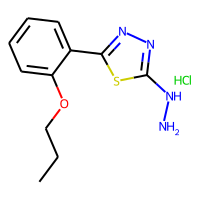
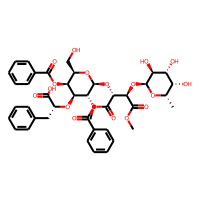
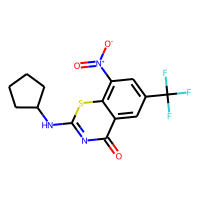
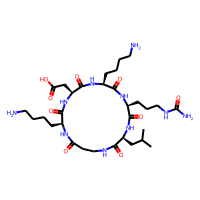
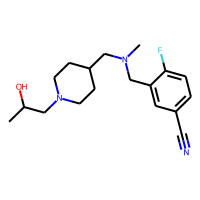
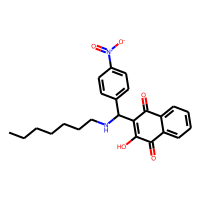
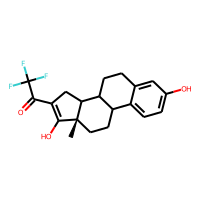
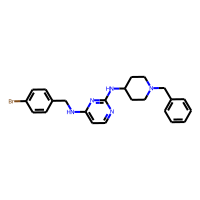
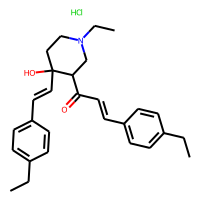
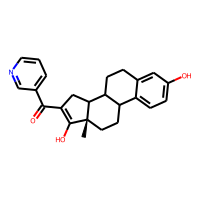

In [73]:
# get fingerprints of molecules in df and add column to store as np array

df['FP'] = df['ROMol'].map(get_cfps)

df

https://github.com/jenniening/Frag20_prepare/blob/master/tutorials/conformation_generation_tutorial.ipynb

## Frag20_prepare

a package developed to prepare datasets for use as ML training inputs -> given SMILES, Frag20_prepare has functionality to generate various 3D conformations (MFF or UFF optimized) and calculate the energies 

prepares datasets such as Frag20 (referenced below)

**DFT** = quantum mechanical modeling system for atomic/molecular systems, used to describe electronic structure (so: like MD but basis is QM equations rather than classical, and the point is to study electrons rather than trajectories etc)
* basis set = set of functions used to describe orbitals … typically consists of functions centered on atoms, linear combinations of which can describe molecules e.g. 6-31G*
* (hybrid) functionals are used to approximate exchange and correlation energies e.g. B3LYP
* Gaussian is a program for running DFT; there are others


https://pubs.acs.org/doi/pdf/10.1021/acs.jcim.1c00007

to calculate energy of molecules you can use either QM (DFT) or molecular mechanics models, but this is limited bc DFT is extremely computationally expensive and classical mechanical force fields aren’t very accurate, so an alternative is machine learning -> to be effective, the dataset for training has to be really diverse, therefore generalizable
* Frag20 = an extremely diverse dataset using molecules from PubChem and ZINC databases. the dataset consists of conformations and these are used as ML inputs
* DataGen python library was developed to take different molecules and generate however many desired conformations of each - these are then passed into Gaussian to be optimized, end goal is to come up with an ML training set
* to generate the conformations you take an input CSV file and literally just run a command gen_conf()

In [9]:
# explore 3d conformations and how the DataGen code works

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem, TorsionFingerprints
from rdkit.ML.Cluster import Butina
from rdkit.Chem import PandasTools
import pandas as pd

## code from https://github.com/jenniening/Frag20_prepare 

def gen_conformers(mol, numConfs=1):
    """Generate conformation with local minimization"""

    ### generate conf using ETKDG method ###
    ps = AllChem.ETKDG()
    ps.maxAttempts = 1000
    ps.randomSeed = 1
    ps.pruneRmsThresh = 0.1
    ps.numThreads = 0
    ids = AllChem.EmbedMultipleConfs(mol, numConfs, ps)
    ### Check MMFF parms ###
    if AllChem.MMFFHasAllMoleculeParams(mol):
        ### MMFF optimize ###
        method = "MMFF"
        for cid in ids:
            _ = AllChem.MMFFOptimizeMolecule(mol, confId=cid)
    else:
        ### UFF optimize ###
        method = "UFF"
        for cid in ids:
            _ = AllChem.UFFOptimizeMolecule(mol, confId=cid)
    return list(ids), method

def cluster_conformers(mol, mode="RMSD", threshold=0.2):
    """
    Cluster conf based on heavy atom rmsd 
    Then Butina is used for clustering
    """
    ### get heavy atom idx ###
    heavyatomidx = []
    for a in mol.GetAtoms():
        if a.GetAtomicNum() != 1:
            heavyatomidx.append(a.GetIdx())

    ### align on heavy atom for each pair and get dmat ###
    n = mol.GetNumConformers()
    dmat = []
    for i in range(n):
        for j in range(i):
            dmat.append(Chem.rdMolAlign.AlignMol(mol, mol, i, j, atomMap=[(k, k) for k in heavyatomidx]))
    ### clustering ###
    rms_clusters = Butina.ClusterData(dmat, mol.GetNumConformers(), threshold, isDistData=True, reordering=True)

    return rms_clusters

In [27]:
# molecule from smiles 
phenol = Chem.MolFromSmiles('Oc1ccccc1')
phenol = Chem.AddHs(phenol) #need to add H's before generating conformers

conf_ids, method = gen_conformers(phenol, numConfs=3)

conf_ids #gives a list of 1 3D conformer because there's only one possible for phenol

[0]

In [23]:
# calculate conformer energy

def calc_energy(idx, mol, conformerId, method, minimizeIts=0):
    """
    Set minimizeIts to be 0 to turn off min
    since MMFF opt have been done before
    Here, it is used to get MMFF energy
    """
    if method == "MMFF":
        try:
            mp = AllChem.MMFFGetMoleculeProperties(mol)
            ff = AllChem.MMFFGetMoleculeForceField(mol, mp, confId=conformerId)
            results = {}
            ### default not minimize,since we already did MMFF optimization, conducting minimization here or not is doesn't matter ###
            if minimizeIts > 0:
                ff.Initialize()
                ff.Minimize(maxIts=minimizeIts)
                ff = AllChem.MMFFGetMoleculeForceField(mol, mp, confId=conformerId)
            results["energy_abs"] = ff.CalcEnergy()
        except:
            ### for some molecules, such as HF, they can't be minimized ###
            results = {}
            results["energy_abs"] = None
    else:
        try:
            ff = AllChem.UFFGetMoleculeForceField(mol)
            results = {}
            if minimizeIts > 0:
                ff.Initialize()
                ff.Minimize(maxIts=minimizeIts)
                ff = AllChem.UFFGetMoleculeForceField(mol)
            results["energy_abs"] = ff.CalcEnergy()
        except:
            ### for some molecules, such as HF, they can't be minimized ###
            results = {}
            results["energy_abs"] = None

    return results

calc_energy(1, phenol, conformerId, "MMFF")[
            "energy_abs"]

5.713261106543854

In [30]:
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
mol = Chem.AddHs(mol) #need to add H's before generating conformers

conf_ids, method = gen_conformers(mol, numConfs=3)

conf_ids

[0, 1, 2]

In [31]:
# calculate the energy of each conformer

for i in conf_ids:
    print(calc_energy(1, mol, i, "MMFF")[
            "energy_abs"])

217.2410365683812
208.80539852262578
217.17389268220055


## fragments of molecules; Murcko decomposition

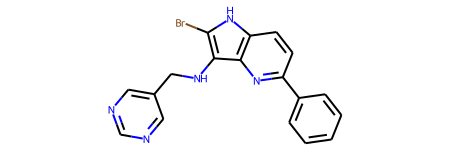

In [43]:
mol = Chem.MolFromSmiles('C(c1cncnc1)NC1=C(Br)Nc2c1nc(c1ccccc1)cc2')
mol

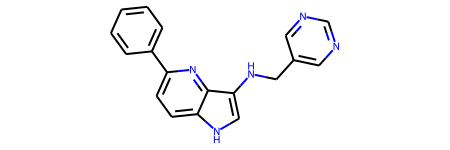

In [55]:
from rdkit.Chem.Scaffolds import MurckoScaffold as Murcko

def get_fragments(insmiles):
    """Get core and sidechains using Murcko fragmentation method
    Args:
        insmiles (str): SMILES for molecule
    Returns:
        core: scaffold SMILES
        side: side chain SMILES
    """

    mol_prev = Chem.MolFromSmiles(insmiles)
    
    ### get core using Murcko fragmentation ###
    core = Murcko.MurckoScaffoldSmilesFromSmiles(insmiles)
    if core != "":
        mol_core = Chem.MolFromSmiles(core)
    
        ### get sidechains ###
        mol_side = Chem.rdmolops.DeleteSubstructs(mol_prev, mol_core)
        side = Chem.MolToSmiles(mol_side).split(".")
    else:
        side = [insmiles]
        
    return core, side

core, side = get_fragments('C(c1cncnc1)NC1=C(Br)Nc2c1nc(c1ccccc1)cc2')

Chem.MolFromSmiles(core)

In [56]:
side

['Br']

**structure-activity relationship (SAR):** “the relationship between the chemical or 3D structure of a molecule and its biological activity”

to deduce potential SAR it is necessary to break molecules into "fragments", evaluate similarity of fragments, and then identify links between fragments and biological activity, if applicable

most common fragmentation scheme = Murcko decomposition, which entails identifying all the ring systems and breaking off side chains

In [59]:
core, side = get_fragments("c1n[nH]c(c1)c2ccc3OCOc3(c2)")

core, side

('c1cc(-c2ccc3c(c2)OCO3)[nH]n1', [''])